In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Task1

빈 칸을 채워주세요!

단계별 output이 github 파일에는 남아있으니 그 output과 동일한 형태인지 확인하면서 진행해주시면 됩니다~

In [2]:
#1. 생성할 문장 데이터

sentence = ("Brick walls are there for a reason and you must not think "
            "that the brick walls aren't there to keep us out, but rather "
            "in this way that the brick walls are there to show us how badly we want things.")

In [3]:
world_set = list(set(sentence))

print(world_set)

['b', 'm', 'h', 'e', 'u', 'y', '.', 'f', 'B', ' ', 'a', 'c', 'i', 'o', ',', 's', 'g', 'p', 'w', 'k', 'l', 'd', 'n', 'r', "'", 't']


In [4]:
#2. 문자 집합 만들기
world_set = list(set(sentence))

## 문제(1): 각 문자에 정수 인코딩 (공백도 하나의 원소로 포함)
vocab = {char: idx for idx, char in enumerate(world_set)}

In [5]:
print(vocab)

# {',': 0, 'r': 1, 'i': 2, 's': 3, "'": 4, 'm': 5, 'l': 6, 'a': 7, 'p': 8, 'o': 9, 't': 10, 'h': 11, ' ': 12, 'e': 13, 'y': 14, 'd': 15, 'B': 16, 'n': 17, 'b': 18, '.': 19, 'w': 20, 'k': 21, 'c': 22, 'g': 23, 'f': 24, 'u': 25}


{'b': 0, 'm': 1, 'h': 2, 'e': 3, 'u': 4, 'y': 5, '.': 6, 'f': 7, 'B': 8, ' ': 9, 'a': 10, 'c': 11, 'i': 12, 'o': 13, ',': 14, 's': 15, 'g': 16, 'p': 17, 'w': 18, 'k': 19, 'l': 20, 'd': 21, 'n': 22, 'r': 23, "'": 24, 't': 25}


In [6]:
#3. 문자 집합 크기 확인
# 문자 집합 크기 : 26

vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 26


In [7]:
#4. 하이퍼 파라미터 설정(자유롭게 수정해보세요!)

hidden_size = vocab_size # 같아야 하는 것 확인!
sequence_length = 3  # 너무 길거나 너무 짧게 잡으면 안됩니다!
learning_rate = 0.01

In [8]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str은 한 칸씩 쉬프트된 sequnce

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i: i + sequence_length]
  y_str = sentence[i+1: i + sequence_length + 1]
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 Bri -> ric
1 ric -> ick
2 ick -> ck 
3 ck  -> k w
4 k w ->  wa
5  wa -> wal
6 wal -> all
7 all -> lls
8 lls -> ls 
9 ls  -> s a
10 s a ->  ar
11  ar -> are
12 are -> re 
13 re  -> e t
14 e t ->  th
15  th -> the
16 the -> her
17 her -> ere
18 ere -> re 
19 re  -> e f
20 e f ->  fo
21  fo -> for
22 for -> or 
23 or  -> r a
24 r a ->  a 
25  a  -> a r
26 a r ->  re
27  re -> rea
28 rea -> eas
29 eas -> aso
30 aso -> son
31 son -> on 
32 on  -> n a
33 n a ->  an
34  an -> and
35 and -> nd 
36 nd  -> d y
37 d y ->  yo
38  yo -> you
39 you -> ou 
40 ou  -> u m
41 u m ->  mu
42  mu -> mus
43 mus -> ust
44 ust -> st 
45 st  -> t n
46 t n ->  no
47  no -> not
48 not -> ot 
49 ot  -> t t
50 t t ->  th
51  th -> thi
52 thi -> hin
53 hin -> ink
54 ink -> nk 
55 nk  -> k t
56 k t ->  th
57  th -> tha
58 tha -> hat
59 hat -> at 
60 at  -> t t
61 t t ->  th
62  th -> the
63 the -> he 
64 he  -> e b
65 e b ->  br
66  br -> bri
67 bri -> ric
68 ric -> ick
69 ick -> ck 
70 ck  -> k w
71 k w ->  wa
72

In [9]:
# 출력해서 한 칸씩 쉬프트된 것 확인하기!
# [16, 1, 2, 22, 21, 12, 20, 7, 6, 6]
# [1, 2, 22, 21, 12, 20, 7, 6, 6, 3]

print(x_data[0])
print(y_data[0])

[8, 23, 12]
[23, 12, 11]


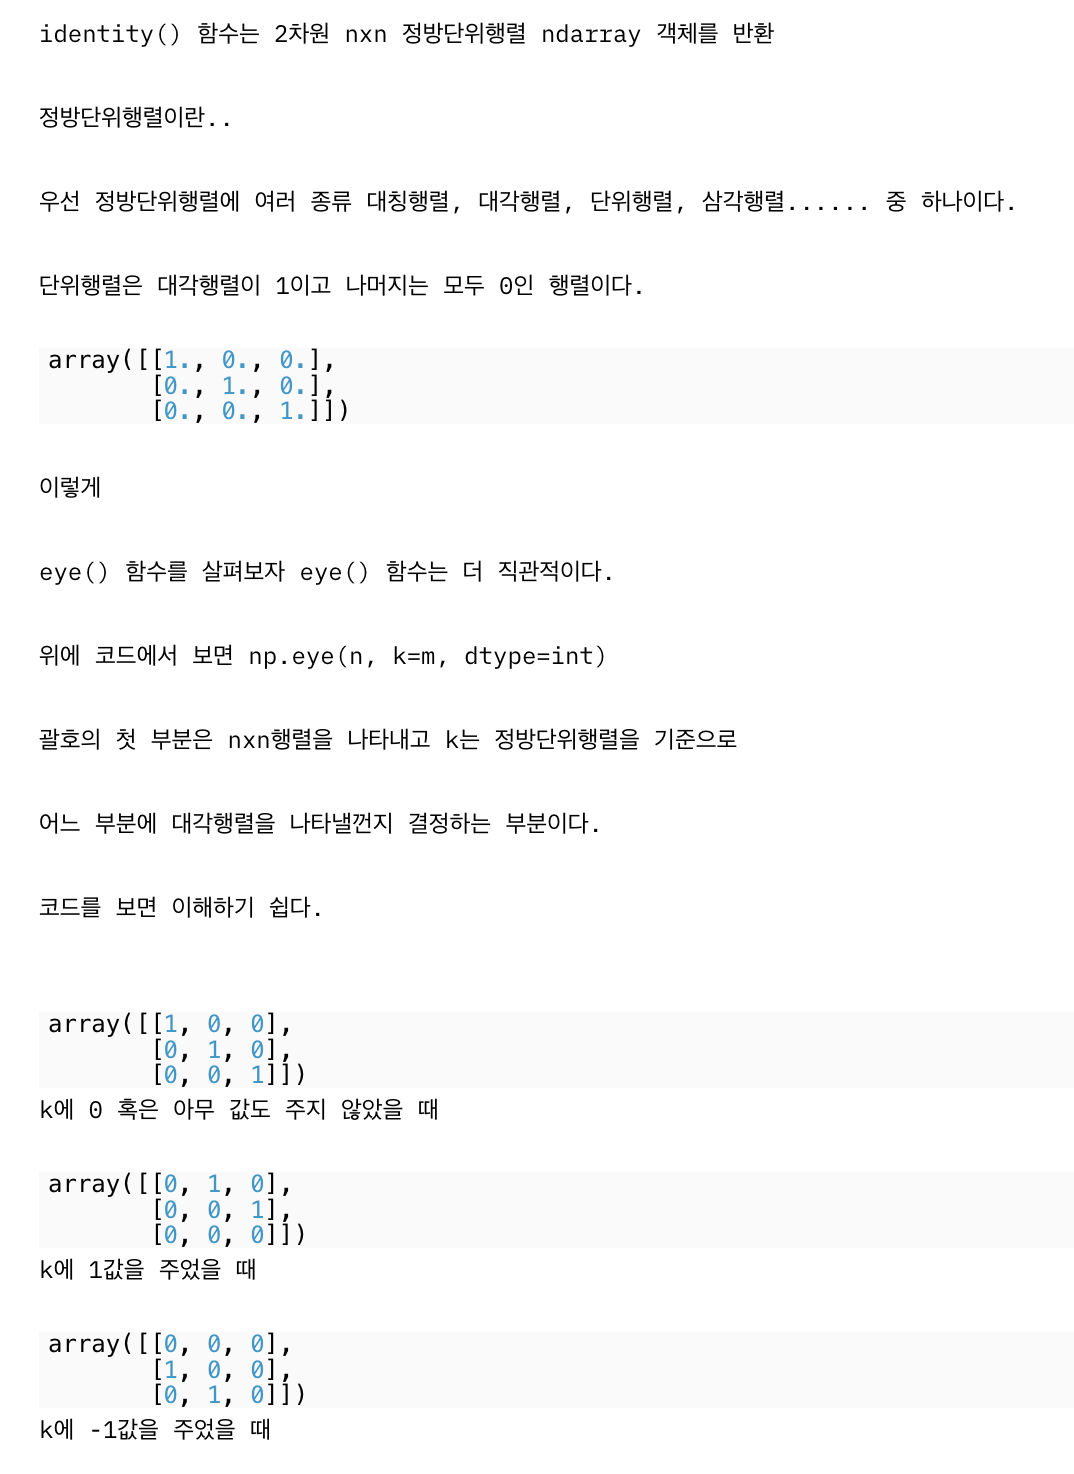

In [10]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
x_one_hot = [np.eye(len(vocab))[c] for c in x_data]
# np.eye(n, k=m, dtype=int) n*n 행렬 / k: 정방단위행렬을 기준으로 어느 부분에 대각행렬을 나타낼 건지

##7. 입력 데이터, 레이블데이터 텐서로 변환

## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTesor 중 맞는 것은?)
X = torch.FloatTensor(x_one_hot) # 32-bit floating point
Y = torch.LongTensor(y_data) # 65-bit integer(signed) # y는 label, 즉 categorical values를 나타내기 때문에

<ipython-input-10-5c332f313bb2>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  X = torch.FloatTensor(x_one_hot) # 32-bit floating point


In [11]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

# 훈련 데이터의 크기 : torch.Size([188, 10, 26]) # batchsize = 188, sequence length = 10, encoding dimension = 26
# 레이블의 크기 : torch.Size([188, 10]) => 188 samples, each with a seq length of 10 characers

훈련 데이터의 크기 : torch.Size([195, 3, 26])
레이블의 크기 : torch.Size([195, 3])


In [12]:
##9.원핫인코딩 결과 샘플 확인하기
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])


In [13]:
##10. 레이블 데이터 샘플 확인하기
print(Y[0])

tensor([23, 12, 11])


In [14]:
##11. RNN 모델 구현

##문제(6) : 기본 pytorch 인자 넣기 연습 + forward 채우기
### 조건 : rnn layer 2개 쌓기 + 마지막은 fc layer
### batch_first 설정 필요할까? (유튜브 강의 참고)

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.hidden_dim = hidden_dim
    self.layers = layers

    self.rnn1 = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first=True) #  If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature)
    self.rnn2 = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first=True) # rnn layer를 두개 쌓는 건 layers=2 or 실제로 레이어 두개 작성?
    self.fc = torch.nn.Linear(hidden_dim, vocab_size) #output_dim = 26 # == vocab size

  def forward(self, x):
    h0 = torch.zeros(self.layers, x.size(0), self.hidden_dim).to(x.device)

    out, _ = self.rnn1(x, h0) # RNN의 마지막 레이어로부터 나온 output feature를 반환
    out, _ = self.rnn2(out,h0)

    out = self.fc(out)
    return out

In [15]:
net = Net(vocab_size, hidden_size, 2)

In [16]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss()

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [17]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape)

torch.Size([195, 3, 26])


In [18]:
##15. Training 시작

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    ##문제(7) : outputs, Y 형태 그대로 넣으면 안되죠. view 함수를 이용해 loss값을 계산해봅시다.
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str += ''.join([world_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += world_set[result[-1]]

    print(predict_str)

ggggggggggsggggggggggggggsggggggggggggggggsggsgggggggggggggggggggggggggggggggsggggggggggggggggggggggggggggggggggggggggsgggggggggggggggggggggggggggggggsggggggggggggggggggsggggggsgggggggggggggggggggs
s  s   s sss  ss     s  ss        s   s   s  s    ss     s  s s   s  ss   s sss  s   s     s  s       s    ss    s    s  a    a s s  s s   s  ss   s sss  ss     s  s    ss s   ss  sss  s s  s      
s                                                                                                                                                                                                    
                                                                                                                                                                                                     
                                                                                                                                                                                                     
          

In [19]:
predict_str

"rick walls are there tor a reason and you must not thenk thet therbrick walls are 't there th seep us hut, but ratherein then wal thet therbrick walls are there th shaw us how uadly we walt thenks."

**sequence length 10:**
rick walls are there tor a reason and you tust not think that the brick walls are 't there to seep us out  but rather tn this way that the brick walls are there to show us how badly wa want thingsk


**sequence length 5:**
rick walls are there tor a reason and you must not think that the brick walls are 't the e to seep us out, but rather in this way that the brick walls are there to show us how badly we want thinksb

**sequence length 20:**
rick walls are there tor a reason and you must not think that the brick walls are 't there to keep us out, but rather in this way that the brick walls are there to show us how badly we want thinlsb

**sequence length 3(worst)**:
rick walls are there tor a reason and you must not thenk thet therbrick walls are 't there th seep us hut, but ratherein then wal thet therbrick walls are there th shaw us how uadly we walt thenks.

결과가 어떤가요?? 마지막 에폭의 문장이 그럴싸한가요?

## Task2

위 sentence는 제가 임의로 생성한 문장들입니다.

마음에 드시는 문구 가져오셔서 문장이 어떻게 생성되는지 확인해보세요!

영어가 아닌 한국어로 시도해보는 것도 좋겠죠?

수정이 많이 필요(토큰화 등) 할 수 있으나 한번 시도해보시는 것 권장드립니다 :)

위 베이스라인은 어디든 수정하셔도 좋고 조금 더 자연스러운 문장이 나올 수 있게 다양한 시도를 해보세요!

조건 : 문장 3개 이상, 연결성이 있는 문장을 " " 으로 구분하여 ( )에 넣기

In [20]:
#1. 생성할 문장 데이터

new = ("Overthinking is the biggest cause of our unhappiness."
        "Keep yourself occupied."
        "Keep your mind off things that don't help you."
        "Be Optimistic.")

In [21]:
#2. 문자 집합 만들기
world_set = list(set(new))

vocab = {char: idx for idx, char in enumerate(world_set)}

In [22]:
print(vocab)

{'O': 0, 'b': 1, 'm': 2, 'h': 3, 'e': 4, 'u': 5, '.': 6, 'v': 7, 'y': 8, 'f': 9, 'B': 10, ' ': 11, 'a': 12, 'c': 13, 'i': 14, 'o': 15, 's': 16, 'g': 17, 'K': 18, 'p': 19, 'k': 20, 'l': 21, 'd': 22, 'n': 23, 'r': 24, "'": 25, 't': 26}


In [23]:
#3. 문자 집합 크기 확인
# 문자 집합 크기 : 27

vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 27


In [52]:
#4. 하이퍼 파라미터 설정

hidden_size = vocab_size # 같아야 하는 것 확인!
sequence_length = 10
learning_rate = 0.01

In [53]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str은 한 칸씩 쉬프트된 sequnce

for i in range(0, len(new) - sequence_length):
  x_str = new[i: i + sequence_length]
  y_str = new[i+1: i + sequence_length + 1]
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 Overthinki -> verthinkin
1 verthinkin -> erthinking
2 erthinking -> rthinking 
3 rthinking  -> thinking i
4 thinking i -> hinking is
5 hinking is -> inking is 
6 inking is  -> nking is t
7 nking is t -> king is th
8 king is th -> ing is the
9 ing is the -> ng is the 
10 ng is the  -> g is the b
11 g is the b ->  is the bi
12  is the bi -> is the big
13 is the big -> s the bigg
14 s the bigg ->  the bigge
15  the bigge -> the bigges
16 the bigges -> he biggest
17 he biggest -> e biggest 
18 e biggest  ->  biggest c
19  biggest c -> biggest ca
20 biggest ca -> iggest cau
21 iggest cau -> ggest caus
22 ggest caus -> gest cause
23 gest cause -> est cause 
24 est cause  -> st cause o
25 st cause o -> t cause of
26 t cause of ->  cause of 
27  cause of  -> cause of o
28 cause of o -> ause of ou
29 ause of ou -> use of our
30 use of our -> se of our 
31 se of our  -> e of our u
32 e of our u ->  of our un
33  of our un -> of our unh
34 of our unh -> f our unha
35 f our unha ->  our unhap
36

In [54]:
# 출력해서 한 칸씩 쉬프트된 것 확인하기!

print(x_data[0])
print(y_data[0])

[0, 7, 4, 24, 26, 3, 14, 23, 20, 14]
[7, 4, 24, 26, 3, 14, 23, 20, 14, 23]


In [55]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
x_one_hot = [np.eye(len(vocab))[c] for c in x_data]
# np.eye(n, k=m, dtype=int) n*n 행렬 / k: 정방단위행렬을 기준으로 어느 부분에 대각행렬을 나타낼 건지

##7. 입력 데이터, 레이블데이터 텐서로 변환

## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTesor 중 맞는 것은?)
X = torch.FloatTensor(x_one_hot) # 32-bit floating point
Y = torch.LongTensor(y_data) # 65-bit integer(signed) # y는 label, 즉 categorical values를 나타내기 때문에

In [56]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

# # batchsize = 121, sequence length = 15, encoding dimension = 27
# 121 samples, each with a seq length of 10 characers

훈련 데이터의 크기 : torch.Size([126, 10, 27])
레이블의 크기 : torch.Size([126, 10])


In [57]:
##9.원핫인코딩 결과 샘플 확인하기
print(X[0])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1

In [58]:
##10. 레이블 데이터 샘플 확인하기
print(Y[0])

tensor([ 7,  4, 24, 26,  3, 14, 23, 20, 14, 23])


In [59]:
##11. RNN 모델 구현

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.hidden_dim = hidden_dim
    self.layers = layers

    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first=True) #  If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature)
    self.fc = torch.nn.Linear(hidden_dim, vocab_size) #output_dim = 27

  def forward(self, x):
    h0 = torch.zeros(self.layers, x.size(0), self.hidden_dim).to(x.device)

    out, _ = self.rnn(x, h0) # RNN의 마지막 레이어로부터 나온 output feature를 반환

    out = self.fc(out)
    return out

In [60]:
net = Net(vocab_size, hidden_size, 2)

In [69]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss()

##13. optimizer
optimizer = optim.Adam(net.parameters(), 0.001) #optim.SGD(net.parameters(), learning_rate)

In [70]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape)

torch.Size([126, 10, 27])


In [71]:
##15. Training 시작

for i in range(500):
    optimizer.zero_grad()
    outputs = net(X)
    ##문제(7) : outputs, Y 형태 그대로 넣으면 안되죠. view 함수를 이용해 loss값을 계산해봅시다.
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str += ''.join([world_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += world_set[result[-1]]

    print(predict_str)

perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappiness.Keep yourself occupied.Keep yoursmind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.
perthinking is the biggest cause of our unhappin

In [72]:
predict_str

"perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic."

rnn1, rnn2: kerthinking is the biggest cause of our unhappiness.Keep yourself occupied.Keep your mind off things that don't help you.Be Optimistic

rnn layer 하나만:
(1) optimizer: adam - perthinking is the biggest cause of our unhappiness.Keep yourself occupied.Keep your mind off things that don't help you.Be Optimistic.

(1-2) lr: 0.001 - verthinking is the biggest cause of our unhappiness.Keep yourself occupied.Keep your mind off things that don't help you.Be Optimistic.

(1-3) sq length: 10 & lr: 0.001 -     eeng  e  ee hu  hng    hou    h our e hu   ne    ee  oour e   oha   ee  ee  oour eing  h  ehung   hu  eiug  hin  oour e    hei   ee

(1-4) sq length: 10 & lr: 0.001 - perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.

(1-5) sq length: 10 & lr: 0.001 & epoch 500 - perthinking is the biggest cause of our unhappiness.Keep your elf occupied.Keep your mind off things that don't help you.Be Optimistic.

(2) optimizer: SGD - perthinking is the biggest cause of our unhappiness.Keep yourself occupied.Keep your mind off things that don't help you.Be Optimistic.


In [73]:
#1. 생성할 문장 데이터

text = ("네 믿음은 네 생각이 된다," "네 생각은 네 말이 된다," "네 말은 네 행동이 된다," "네 행동은 네 습관이 된다," "네 습관은 네 가치가 된다," "네 가치는 네 운명이 된다.")

In [74]:
#2. 문자 집합 만들기
world_set = list(set(text))

vocab = {char: idx for idx, char in enumerate(world_set)}

vocab_size = len(vocab)

print(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

{'은': 0, '다': 1, '.': 2, '는': 3, '명': 4, ' ': 5, '된': 6, '각': 7, ',': 8, '네': 9, '치': 10, '습': 11, '가': 12, '음': 13, '생': 14, '행': 15, '관': 16, '말': 17, '동': 18, '믿': 19, '이': 20, '운': 21}
문자 집합 크기 : 22


In [109]:
#4. 하이퍼 파라미터 설정

hidden_size = vocab_size # 같아야 하는 것 확인!
sequence_length = 5
learning_rate = 0.01

#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str은 한 칸씩 쉬프트된 sequnce

for i in range(0, len(text) - sequence_length):
  x_str = text[i: i + sequence_length]
  y_str = text[i+1: i + sequence_length + 1]
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 네 믿음은 ->  믿음은 
1  믿음은  -> 믿음은 네
2 믿음은 네 -> 음은 네 
3 음은 네  -> 은 네 생
4 은 네 생 ->  네 생각
5  네 생각 -> 네 생각이
6 네 생각이 ->  생각이 
7  생각이  -> 생각이 된
8 생각이 된 -> 각이 된다
9 각이 된다 -> 이 된다,
10 이 된다, ->  된다,네
11  된다,네 -> 된다,네 
12 된다,네  -> 다,네 생
13 다,네 생 -> ,네 생각
14 ,네 생각 -> 네 생각은
15 네 생각은 ->  생각은 
16  생각은  -> 생각은 네
17 생각은 네 -> 각은 네 
18 각은 네  -> 은 네 말
19 은 네 말 ->  네 말이
20  네 말이 -> 네 말이 
21 네 말이  ->  말이 된
22  말이 된 -> 말이 된다
23 말이 된다 -> 이 된다,
24 이 된다, ->  된다,네
25  된다,네 -> 된다,네 
26 된다,네  -> 다,네 말
27 다,네 말 -> ,네 말은
28 ,네 말은 -> 네 말은 
29 네 말은  ->  말은 네
30  말은 네 -> 말은 네 
31 말은 네  -> 은 네 행
32 은 네 행 ->  네 행동
33  네 행동 -> 네 행동이
34 네 행동이 ->  행동이 
35  행동이  -> 행동이 된
36 행동이 된 -> 동이 된다
37 동이 된다 -> 이 된다,
38 이 된다, ->  된다,네
39  된다,네 -> 된다,네 
40 된다,네  -> 다,네 행
41 다,네 행 -> ,네 행동
42 ,네 행동 -> 네 행동은
43 네 행동은 ->  행동은 
44  행동은  -> 행동은 네
45 행동은 네 -> 동은 네 
46 동은 네  -> 은 네 습
47 은 네 습 ->  네 습관
48  네 습관 -> 네 습관이
49 네 습관이 ->  습관이 
50  습관이  -> 습관이 된
51 습관이 된 -> 관이 된다
52 관이 된다 -> 이 된다,
53 이 된다, ->  된다,네
54  된다,네 -> 된다,네 
55 된다,네  -> 다,네 습
56

In [110]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

x_one_hot = [np.eye(len(vocab))[c] for c in x_data]

##7. 입력 데이터, 레이블데이터 텐서로 변환

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([83, 5, 22])
레이블의 크기 : torch.Size([83, 5])


In [111]:
##11. RNN 모델 구현

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.hidden_dim = hidden_dim
    self.layers = layers

    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first=True) #  If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature)
    self.fc = torch.nn.Linear(hidden_dim, vocab_size) #output_dim = 27

  def forward(self, x):
    h0 = torch.zeros(self.layers, x.size(0), self.hidden_dim).to(x.device)

    out, _ = self.rnn(x, h0) # RNN의 마지막 레이어로부터 나온 output feature를 반환

    out = self.fc(out)
    return out

In [112]:
net = Net(vocab_size, hidden_size, 2)

In [113]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss()

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [114]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape)

torch.Size([83, 5, 22])


In [115]:
##15. Training 시작

for i in range(500):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str += ''.join([world_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += world_set[result[-1]]

    print(predict_str)

운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운운
운이네네네네네이네네네이네네네네이네네네은네이네네네운네네네이네은네네이네은네네운네네네이네네네네네이네이네이다네네네이네이다네네이네네네네이네네네이네네네네네이네이네이네네
네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네
네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네
네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네네
네네네네네네 네네네네네네네네네네네네네네 네네네네네네네네네네네네 네네네네네네네네네네네네네네 네네네네네네네네네네 네네네 네네네네네네네네네네네네네네 네네네네네네네
네네                                                                                     
                                                                                       
                                                                                       
                                                                                       
                                                                                       
            다,   다        다,   다

In [116]:
predict_str

' 말음은 네 생각이 된다,네 행각은 네 말이 된다,네 행은 네 행동이 된다,네 행동은 네 습관이 된다,네 행관은 네 가치가 된다,네 행치는 네 운명이 된다.'

1-1. sq length 5, epoch 100: 행음은 네 생각이 된다,네 습각은 네 습이 된다,네 습은 네 생동이 된다,네 습동은 네 습관이 된다,네 습관은 네 가치가 된다,네 습치는 네 운명이 된다,

1-2. sq length 5, epoch 300:  생음은 네 생각이 된다,네 행각은 네 말이 된다,네 행은 네 행동이 된다,네 행동은 네 습관이 된다,네 행관은 네 가치가 된다,네 행치는 네 운명이 된다.

1-3. sq length 5, epoch 500:  말음은 네 생각이 된다,네 행각은 네 말이 된다,네 행은 네 행동이 된다,네 행동은 네 습관이 된다,네 행관은 네 가치가 된다,네 행치는 네 운명이 된다.

2. sq length 3, epoch 100:  말음은 네 가각이 된다,네 가각이 네 가이 된다,네 가이 네 가동이 된다,네 가동이 네 가관은 된다,네 가관은 네 가치는 된다,네 가치는 네 가명이 된다,

3-1. sq length 8, epoch 100:  생음은 네 가각이 된다,네 말각은 네 말이 된다,네 말은 네 행동이 된다,네 말동은 네 말관이 된다,네 말관은 네 가치가 된다,네 말치는 네 운명이 된다.

3-2. sq length 8, epoch 500:  말음은 네 생각이 된다,네 생각은 네 말이 된다,네 말은 네 행동이 된다,네 행동은 네 습관이 된다,네 습관은 네 가치가 된다,네 가치는 네 운명이 된다.